### import important library

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
os.chdir('E:\\prasad\\practice\\TimeSeries')

In [3]:
df=pd.read_excel('ts_data.xlsx')

In [4]:
df.shape

(10000, 2)

In [5]:
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


In [6]:
df.isnull().sum()

Time     0
Value    0
dtype: int64

### Visualize Data is Stationary or Not

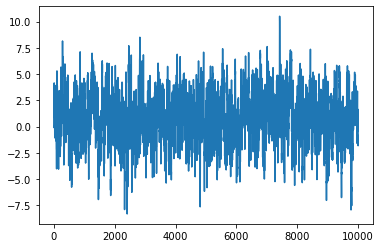

In [7]:
plt.plot(df.Value)
plt.show()

In [8]:
X=df.Value.values

In [9]:
X.shape

(10000,)

In [10]:
X

array([ 0.        , -0.09026324,  0.74999537, ..., -1.40154641,
       -1.81770095, -0.8586233 ])

### Check Data is Stationary Or Not by using adfuller test

In [11]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
result=sts.adfuller(X)

In [13]:
# p-value<0.5 So Reject the null hypothesis & accept the alternative hypothesis
# So Data is Stationary
result

(-22.184930227348687,
 0.0,
 0,
 9999,
 {'1%': -3.4310041633725734,
  '5%': -2.861829101294412,
  '10%': -2.566923883481157},
 28167.381318321917)

### Create  ACF & PACF Plot

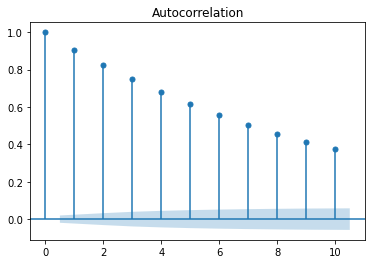

In [14]:
sgt.plot_acf(X,lags=10)
plt.show()

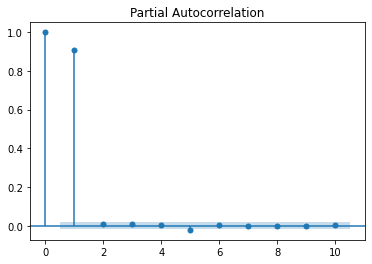

In [15]:
sgt.plot_pacf(X,lags=10)
plt.show()

### Data Shifted by 1

In [16]:
df['values_shifted']=df['Value'].shift(1)

In [17]:
df.head()

,Time,Value,values_shifted
0,1,0.000000,NaN
1,2,-0.090263,0.000000
2,3,0.749995,-0.090263
3,4,1.247887,0.749995
4,5,0.131282,1.247887


In [18]:
df.drop('Time',axis=1,inplace=True)

In [19]:
df.isnull().sum()

Value             0
values_shifted    1
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

Value             0
values_shifted    0
dtype: int64

In [22]:
df.head()

,Value,values_shifted
1,-0.090263,0.000000
2,0.749995,-0.090263
3,1.247887,0.749995
4,0.131282,1.247887
5,0.562619,0.131282


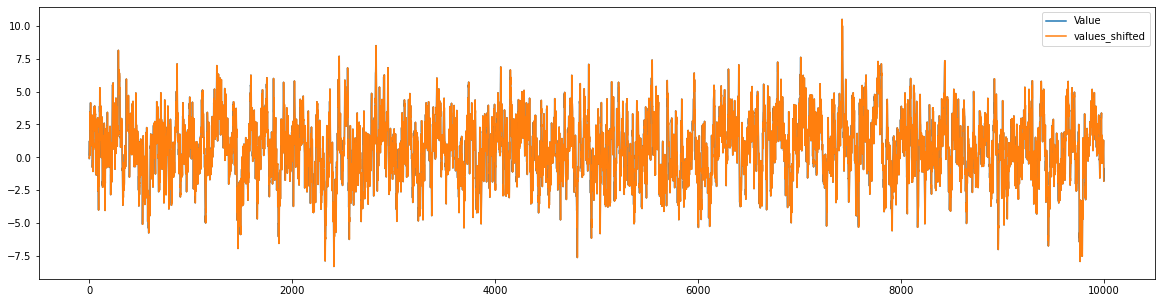

In [23]:
df.plot(figsize=(20,5))
plt.show()

In [24]:
df.columns

Index(['Value', 'values_shifted'], dtype='object')

In [25]:
df.shape

(9999, 2)

In [26]:
y=df.Value.values
X=df.values_shifted.values

### Split Data into Train & Test

In [27]:
train_size=int(len(X)*0.80)

In [28]:
X_train,X_test=X[0:train_size],X[train_size:len(X)]
y_train,y_test=y[0:train_size],y[train_size:len(X)]

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7999,), (2000,), (7999,), (2000,))

In [30]:
len(X_train)

7999

In [31]:
X_train.ndim

1

In [32]:
X_test.ndim

1

### Convert X_train & X_test in 1D to 2D

In [33]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [34]:
X_train.ndim

2

In [35]:
X_test.ndim

2

### Use Linear Regression Technique

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=lr.predict(X_test)

In [40]:
y_pred

array([ 1.86151038,  1.85037921,  1.92110412, ...,  0.57410445,
       -1.20043148, -1.57726306])

In [41]:
lr.coef_

array([0.90550879])

In [42]:
lr.intercept_

0.06868111625452322

### Visualize the Actual & Predicted Values

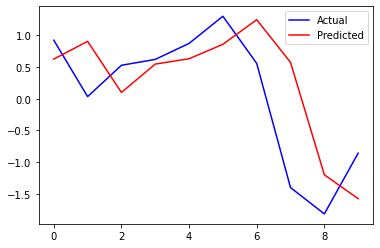

In [43]:
plt.plot(y_test[-10:],label='Actual',color='Blue')
plt.plot(y_pred[-10:],label='Predicted',color='Red')
plt.legend()
plt.show()

## Creat AR Model

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
model=ARIMA(y_train,order=(1,0,0))

In [46]:
model_fit=model.fit()

In [47]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7999
Model:                     ARMA(1, 0)   Log Likelihood              -11364.832
Method:                       css-mle   S.D. of innovations              1.002
Date:                Wed, 17 Feb 2021   AIC                          22735.663
Time:                        12:59:26   BIC                          22756.624
Sample:                             0   HQIC                         22742.838
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7250      0.118      6.130      0.000       0.493       0.957
ar.L1.y        0.9054      0.005    190.940      0.000       0.896       0.915
                                    Roots           